In [2]:
import pandas as pd

# Load the COVID-19 dataset

df_covid = pd.read_csv('C:\\Users\\USER\\Desktop\cov\\covid 19 CountryWise.csv')

# Fill missing values with 0
df_covid.fillna(0, inplace=True)

# Convert numeric columns
num_cols = [
    "Total Cases", "Total Cases per 100k pop", "New Cases (7 days)",
    "New Cases per 100k pop (7 days)", "New Cases (24 hours)", "Total Deaths",
    "Total Deaths per 100k pop", "New Deaths (7 days)", "New Deaths per 100k pop (7 days)",
    "New Deaths (24 hours)"
]
df_covid[num_cols] = df_covid[num_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
summary_stats = df_covid.describe()
print(summary_stats)



        Total Cases  Total Cases per 100k pop  New Cases (7 days)  \
count  2.370000e+02                237.000000          237.000000   
mean   2.564328e+06              18240.346633        13656.540084   
std    8.411666e+06              18336.984496        64795.976248   
min    0.000000e+00                  0.000000            0.000000   
25%    2.055200e+04               1728.724000            2.000000   
50%    1.849660e+05              12287.562000          100.000000   
75%    1.149364e+06              30112.304000         2174.000000   
max    9.415257e+07              70926.021000       638200.000000   

       New Cases per 100k pop (7 days)  New Cases (24 hours)  Total Deaths  \
count                       237.000000            237.000000  2.370000e+02   
mean                         67.347629           2199.046414  2.742087e+04   
std                         175.721595          11009.984650  9.772406e+04   
min                           0.000000              0.000000  0.00

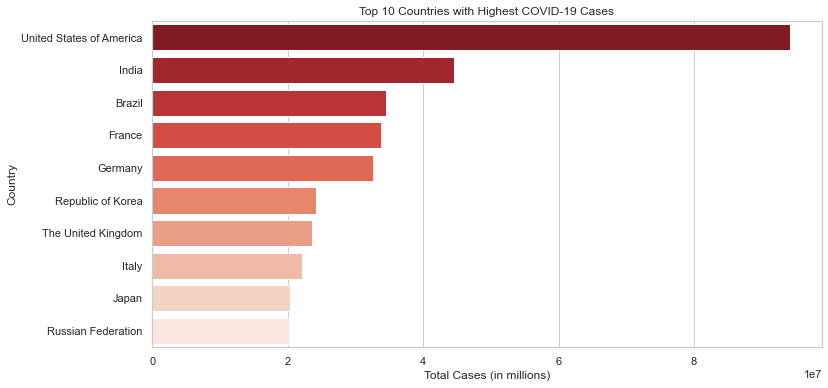

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Top 10 Countries with Highest Cases
top_cases = df_covid.nlargest(10, "Total Cases")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cases, x="Total Cases", y="Country", palette="Reds_r")
plt.xlabel("Total Cases (in millions)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.show()


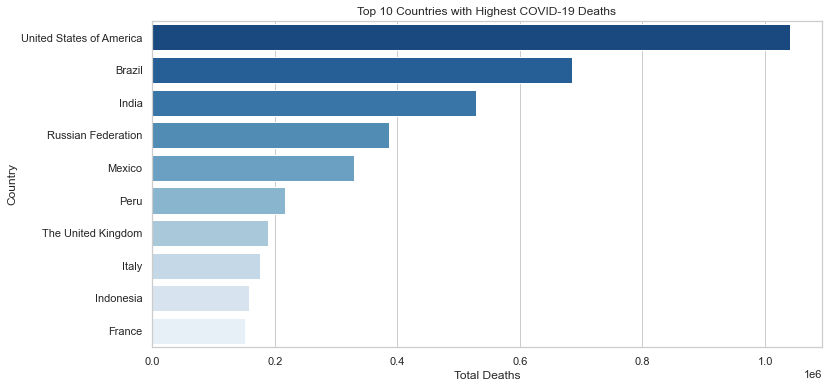

In [5]:
# Top 10 Countries with Highest Deaths
top_deaths = df_covid.nlargest(10, "Total Deaths")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_deaths, x="Total Deaths", y="Country", palette="Blues_r")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest COVID-19 Deaths")
plt.show()

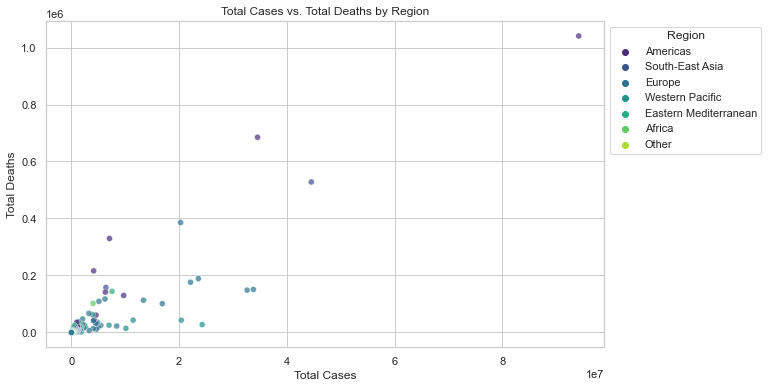

In [6]:
# Cases vs. Deaths Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_covid, x="Total Cases", y="Total Deaths", hue="Region", palette="viridis", alpha=0.7)
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs. Total Deaths by Region")
plt.legend(title="Region", bbox_to_anchor=(1, 1))
plt.show()

In [8]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install escape

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Prepare data (Using Total Cases as a time-series-like feature)
df_covid_sorted = df_covid.sort_values(by="Total Cases", ascending=True).reset_index()

# Create a feature (Days since first case)
df_covid_sorted["Days"] = np.arange(len(df_covid_sorted))

# Features and target variable
X = df_covid_sorted[["Days"]]
y = df_covid_sorted["Total Cases"]

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future cases
future_days = np.array(range(len(df_covid_sorted), len(df_covid_sorted) + 30)).reshape(-1, 1)
future_cases = model.predict(future_days)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



Mean Absolute Error: 3683075.9306862033


C:\Users\USER\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


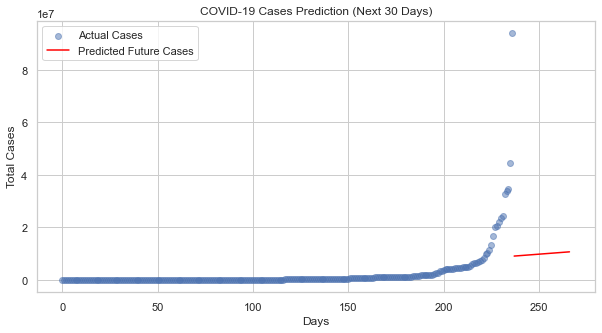

In [13]:

# Plot predictions
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Cases", alpha=0.5)
plt.plot(future_days, future_cases, color="red", label="Predicted Future Cases")
plt.xlabel("Days")
plt.ylabel("Total Cases")
plt.title("COVID-19 Cases Prediction (Next 30 Days)")
plt.legend()
plt.show()

In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sort and create a time feature
df_covid_sorted = df_covid.sort_values(by="Total Cases", ascending=True).reset_index()
df_covid_sorted["Days"] = np.arange(len(df_covid_sorted))

# Features and target variable
X = df_covid_sorted[["Days"]]
y = df_covid_sorted["Total Cases"]

# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict next 30 days
future_days = np.array(range(len(df_covid_sorted), len(df_covid_sorted) + 30)).reshape(-1, 1)
future_cases = model.predict(future_days)

# Predict on test set for validation
y_pred = model.predict(X_test)

print(" XGBoost model trained & future predictions generated.")


 XGBoost model trained & future predictions generated.


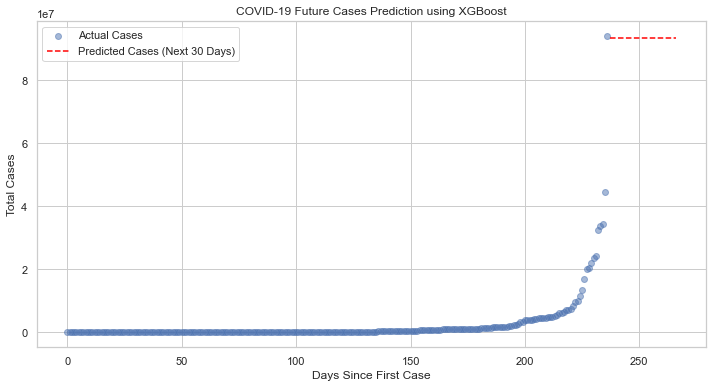

In [16]:
# Plot Predictions
plt.figure(figsize=(12, 6))

# Scatter plot for actual cases
plt.scatter(X, y, label="Actual Cases", alpha=0.5)

# Line plot for predicted future cases
plt.plot(future_days, future_cases, color="red", linestyle="dashed", label="Predicted Cases (Next 30 Days)")

plt.xlabel("Days Since First Case")
plt.ylabel("Total Cases")
plt.title("COVID-19 Future Cases Prediction using XGBoost")
plt.legend()
plt.grid(True)
plt.show()
